# Exploring Realstate Sales Prices

In [1]:
%pip install mpld3
%pip install seaborn
%pip install friendly
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 7.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.8/93.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.6/732.6 kB 18.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import friendly

## 1. Exploration

### Question 1

Load the titanic using `pandas`. It is located in `datasets/ames_housing.csv`. Using the function `head()` and `info()`, which issues do you identify which need to be noted before to learn a machine learning model.

The dataset is described in https://www.kaggle.com/datasets/prevek18/ames-housing-dataset

In [4]:
data = pd.read_csv('datasets/ames_housing.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Question 2

- Identify the target variable: "SalePrice", what's its type? What are its distributionals characteristics?
- What variables contain more missing values?

In [5]:
data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

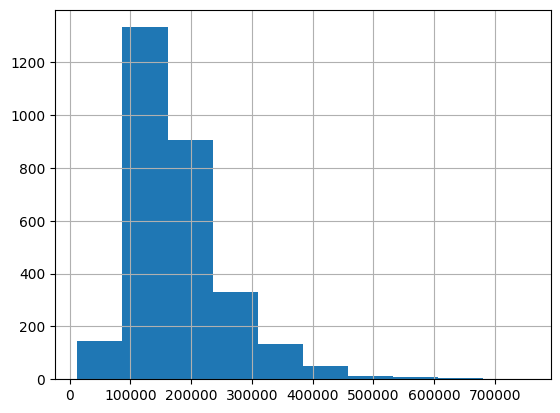

In [6]:
data['SalePrice'].hist()

## Question 3
Split the data into features and target variables.
Then, the data into a model selection, sample and a model evaluation sample. Use `sklearn.model_selection.train_test_split`.
Use a 20% ratio.

In [7]:
from sklearn.model_selection import train_test_split
target = data["SalePrice"]
features = data.drop(columns="SalePrice")

selection_features, evaluation_features, selection_target, evaluation_target = train_test_split(
    features, target, test_size=.2
)
selection_target.shape

(2344,)

In [8]:
print("Ratio of elements in the selection set by total", len(selection_target) / len(target))
print("Ration of elements in the evaluation set by total", len(evaluation_target) / len(target))

Ratio of elements in the selection set by total 0.8
Ration of elements in the evaluation set by total 0.2


## Question 4
Extract the columns with numerical data using `selection_features.select_dtypes("number")`. Examine their distributions, through histograms. What issues do you identify? Then use  `selection_features.select_dtypes("object")` and seaborn's `sns.countplot` to analyze the string variables. Identify data types and issues.

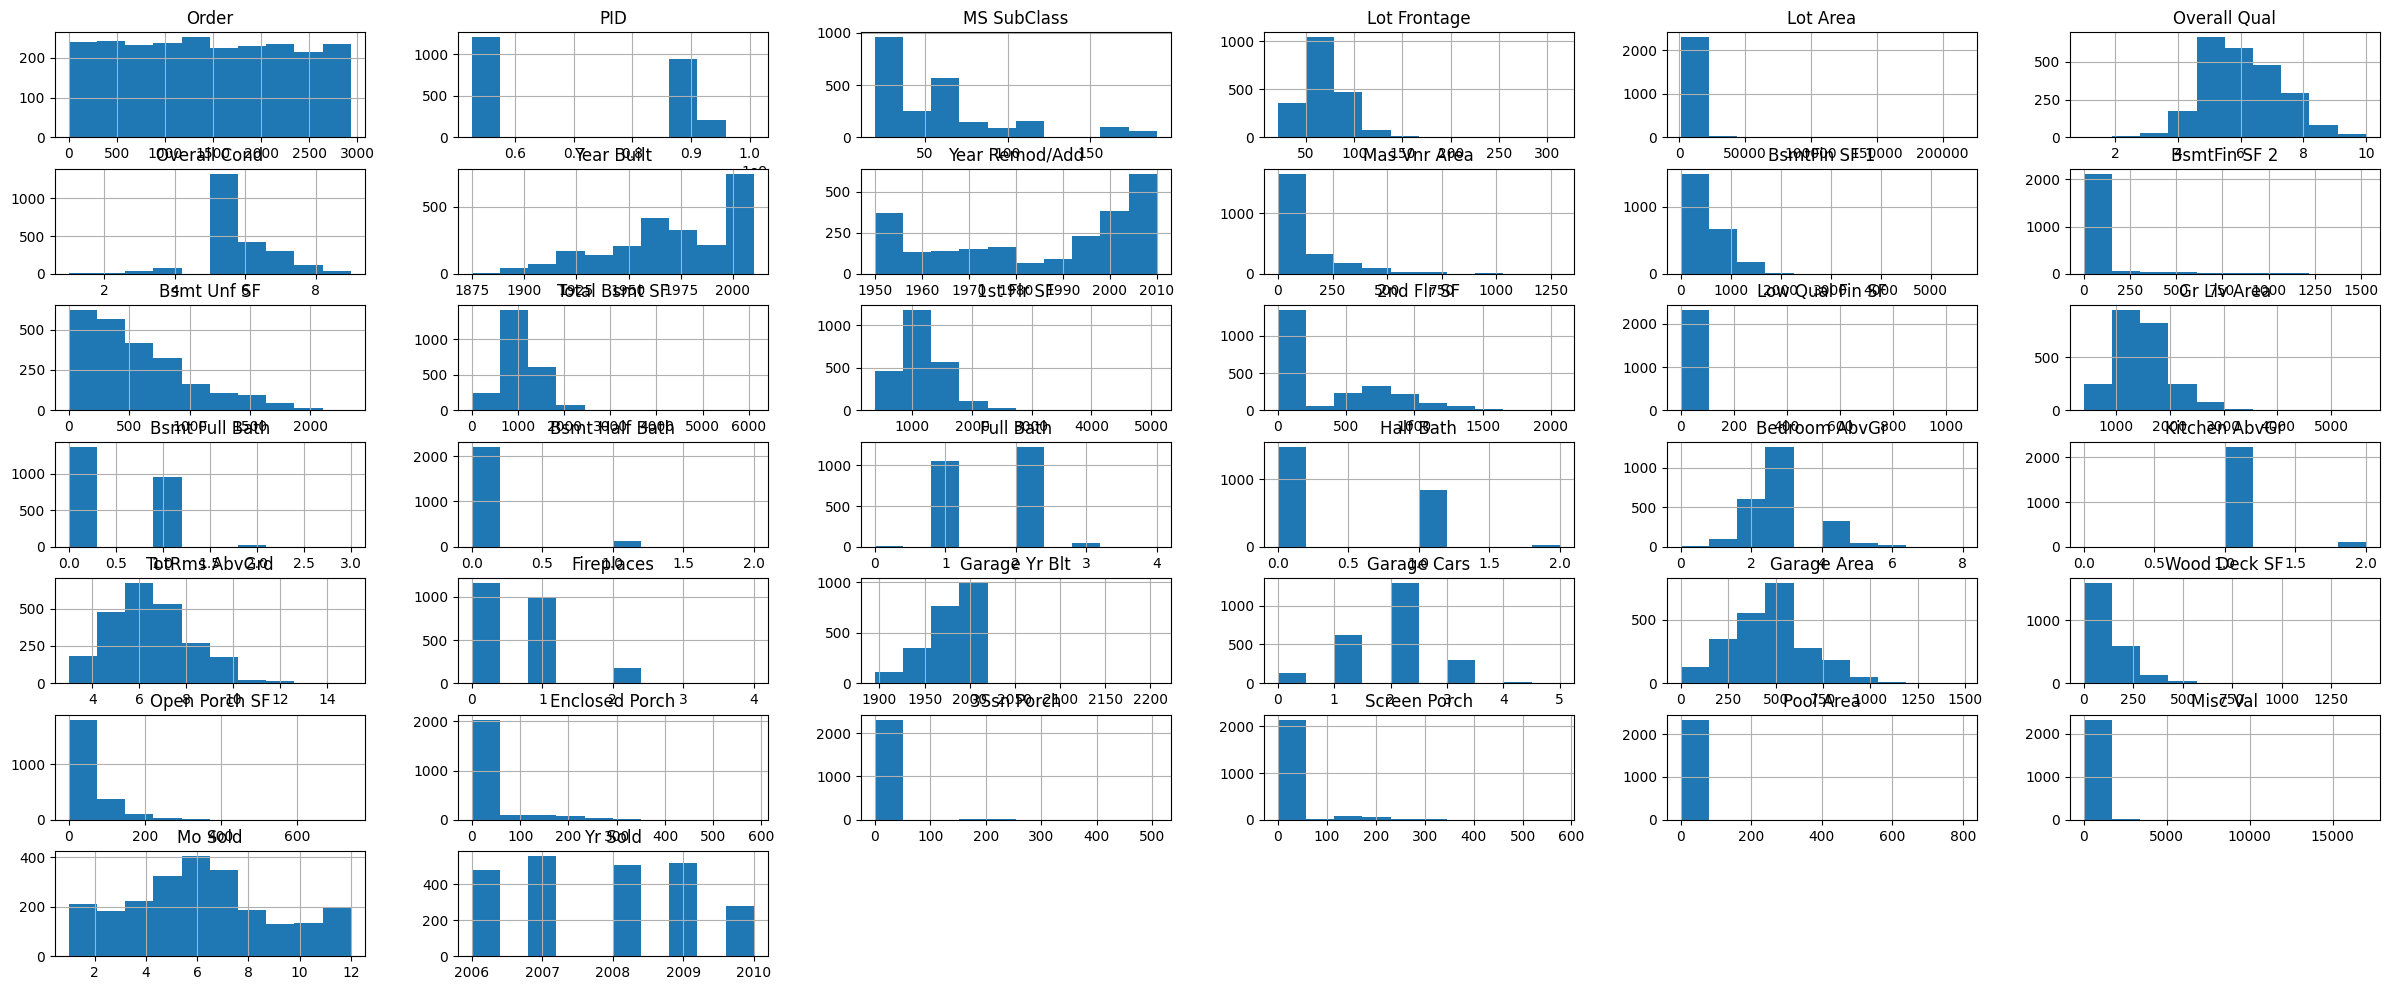

In [9]:
numeric_features = selection_features.select_dtypes("number")
numeric_features.hist(figsize=(30, 12));

In [10]:
selection_features.select_dtypes("object").describe()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2344,2344,167,2344,2344,2344,2344,2344,2344,2344,...,2218,2216,2216,2216,2344,11,452,83,2344,2344
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1814,2334,105,1476,2103,2341,1723,2234,350,2017,...,1383,984,2089,2136,2121,4,270,74,2037,1940


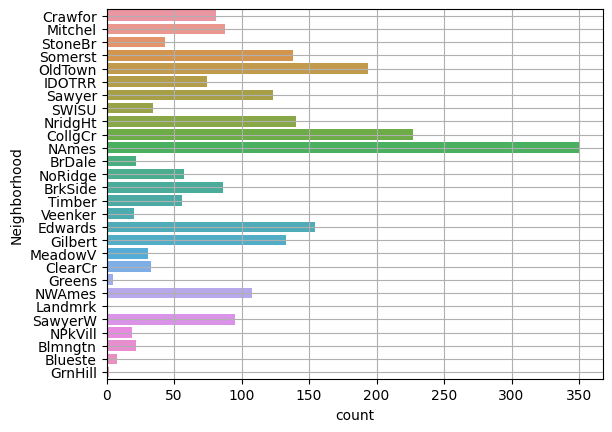

In [11]:
sns.countplot(
    y=selection_features.select_dtypes("object").columns[8],
    data=selection_features.select_dtypes("object")
)
plt.grid()

# Section 2: Implement a linear regressor using only the numerical variables

### Question 1
Use a Column Transformer to _just select_ the numerical variables. Build a linear regressor using `sklearn.linear.LinearRegressor

For this we will
* build the column transformer
* build the machine learning pipeline
* evaluate it trough cross-validation (using `cross_vals_score`)

Does it work? Why?

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

array([-0.17084274, -0.18605435, -0.19728688, -0.16409366, -0.16710064])

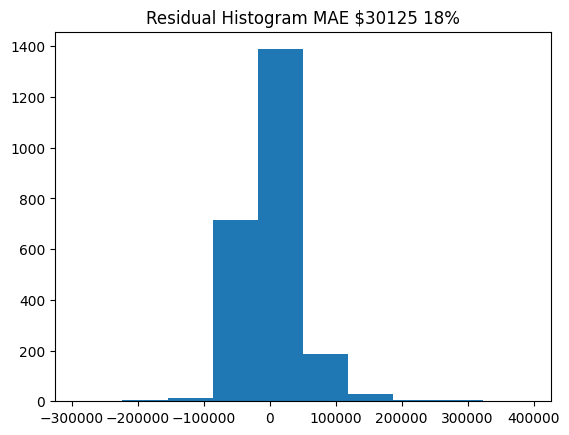

In [13]:
# Build the preprocessing
preprocessing = make_column_transformer(
    (StandardScaler(), ['Lot Area', 'Year Built']),
    ('passthrough', ['Overall Qual']),
)

# Build a pipeline with the preprocessing and a linear regression model
pipeline = make_pipeline(preprocessing, LinearRegression())

# Train or fit the model
pipeline.fit(selection_features, selection_target)

# Predict and analyse the prediction error
prediction = pipeline.predict(selection_features)
plt.hist(selection_target - prediction);
plt.title(
    f"Residual Histogram MAE ${mean_absolute_error(selection_target, prediction):.0f} "
    f"{mean_absolute_percentage_error(selection_target, prediction) * 100:.0f}%"
)
cross_val_score(pipeline, selection_features, selection_target, scoring='neg_mean_absolute_percentage_error')

### Question 2
Fix the previous issue using, first dropping the problemating rows, then using the `SimpleImputer`


In [14]:
from sklearn.impute import SimpleImputer

In [15]:
# Build the preprocessing
preprocessing = make_column_transformer(
    (
        make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()),
        selection_features.select_dtypes("number").columns
    ),
)

# Build a pipeline with the preprocessing and a linear regression model
pipeline = make_pipeline(preprocessing, LinearRegression())

# Cross-validate and analyse the prediction error
cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 20
)

array([-0.11491281, -0.13345079, -0.14679608, -0.11168454, -0.12086406])

### Question 3
Now plot the evolution of mean and standard deviations for test sample sizes of 05%, 10%, 20%, 25%, 30%. What do you conclude?


In [16]:
cv_05 = cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 5
)

cv_10 = cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 10
)

cv_20 = cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 20
)

cv_25 = cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 25
)

cv_30 = cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 30
)

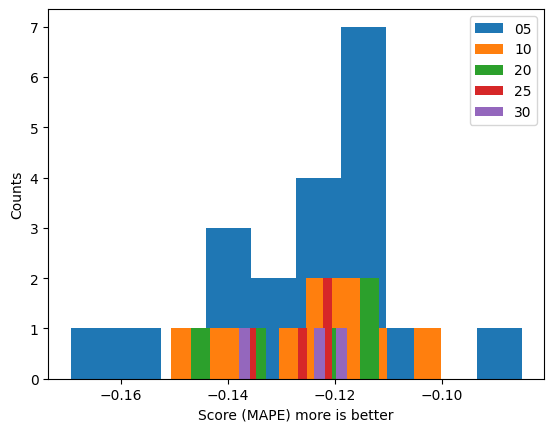

In [17]:
plt.hist(cv_05, label="05")
plt.hist(cv_10, label="10")
plt.hist(cv_20, label="20")
plt.hist(cv_25, label="25")
plt.hist(cv_30, label="30")
plt.ylabel("Counts")
plt.xlabel("Score (MAPE) more is better")
plt.legend()

### Question 4
Use `sklearn.model_selection.learning_curve` to study the learning curve https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=learning_curve

In [18]:
from sklearn.model_selection import learning_curve

In [19]:
lr_results = learning_curve(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    train_sizes=[0.1  , 0.325, 0.55 , 0.775, 1.   ],
    cv=10
)

In [ ]:
len(valid)

(0.0, 1.0)

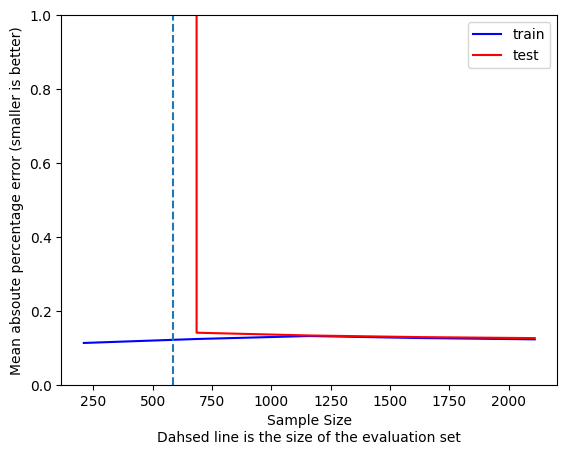

In [25]:
train_sizes, train_scores, test_scores = lr_results
plt.plot(train_sizes, -np.mean(train_scores, axis=1), c='b', label='train');
plt.plot(train_sizes, -np.mean(test_scores, axis=1), c='r', label='test');
plt.legend()
plt.xlabel("Sample Size\nDahsed line is the size of the evaluation set")
plt.ylabel("Mean absoute percentage error (smaller is better)")
plt.axvline(len(evaluation_target), ls='--')
plt.ylim(0, 1)

### Question 5
Are there corrleations between the features? Explore it through the correlation matrix, and the `sns.pairplot` plotting tool from seaborn (warning, if you plot all variables together it might be slow). Alternatively compute the correlation matrix across features with pandas' DataFrame `corr` function  and show it with `sns.heatmap`

In [ ]:
number_corr = selection_features.select_dtypes("number").corr()
sns.heatmap(number_corr, cmap='seismic', vmin=-1, vmax=1)

### Question 6
Can we use this correlation to improve the learning curve? This is regularization, let's try ridge regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Plot the learning curve and compare it with the plain linear regression

In [29]:
from sklearn.linear_model import Ridge

In [50]:
# Build the preprocessing
preprocessing = make_column_transformer(
    (
        make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()),
        selection_features.select_dtypes("number").columns
    ),
)

# Build a pipeline with the preprocessing and a linear regression model
ridge_pipeline = make_pipeline(preprocessing, Ridge(alpha=10000))

# Learning curve for Ridge
ridge_results = learning_curve(
    ridge_pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    train_sizes=[0.1  , 0.325, 0.55 , 0.775, 1.   ],
    cv=10
)

(0.0, 0.4)

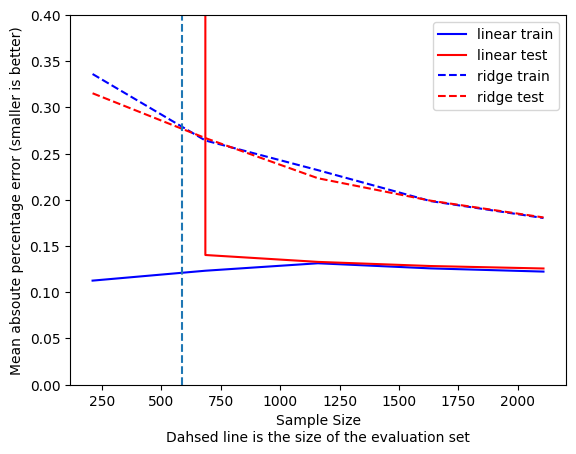

In [51]:
train_sizes, train_scores, test_scores = lr_results
ridge_train_sizes, ridge_train_scores, ridge_test_scores = ridge_results

plt.plot(train_sizes, -np.mean(train_scores, axis=1), c='b', label='linear train');
plt.plot(train_sizes, -np.mean(test_scores, axis=1), c='r', label='linear test');
plt.plot(train_sizes, -np.mean(ridge_train_scores, axis=1), c='b', ls='--', label='ridge train');
plt.plot(train_sizes, -np.mean(ridge_test_scores, axis=1), c='r', ls='--', label='ridge test');

plt.legend()
plt.xlabel("Sample Size\nDahsed line is the size of the evaluation set")
plt.ylabel("Mean absoute percentage error (smaller is better)")
plt.axvline(len(evaluation_target), ls='--')
plt.ylim(0, .4)

### Question 6.1
How did you pick your regularization parameter? Use a grid search now. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [39]:
GridSearchCV?

In [38]:
from sklearn.model_selection import GridSearchCV

In [92]:
# Build the preprocessing
preprocessing = make_column_transformer(
    (
        make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()),
        selection_features.select_dtypes("number").columns
    ),
)

# Build a pipeline with the preprocessing and a linear regression model
ridge_cv_pipeline = make_pipeline(
    preprocessing,
    GridSearchCV(Ridge(), param_grid={'alpha': [0.1, 1, 10, 1000]})
  )

# Learning curve for Ridge
ridge_cv_results = learning_curve(
    ridge_cv_pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    train_sizes=[0.1  , 0.325, 0.55 , 0.775, 1.   ],
    cv=10
)

(0.0, 1.0)

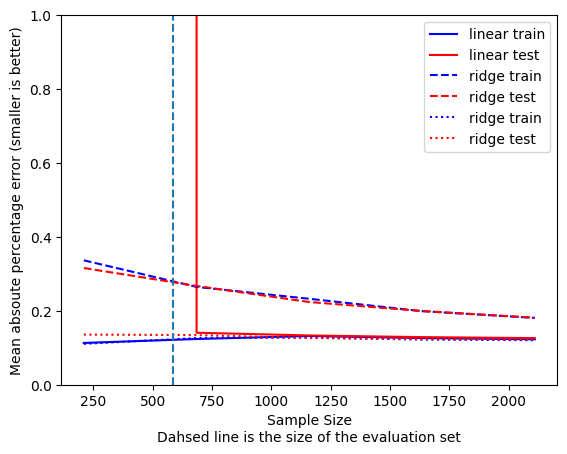

In [93]:
train_sizes, train_scores, test_scores = lr_results
ridge_train_sizes, ridge_train_scores, ridge_test_scores = ridge_results
_, ridge_cv_train_scores, ridge_cv_test_scores = ridge_cv_results


plt.plot(train_sizes, -np.mean(train_scores, axis=1), c='b', label='linear train');
plt.plot(train_sizes, -np.mean(test_scores, axis=1), c='r', label='linear test');
plt.plot(train_sizes, -np.mean(ridge_train_scores, axis=1), c='b', ls='--', label='ridge train');
plt.plot(train_sizes, -np.mean(ridge_test_scores, axis=1), c='r', ls='--', label='ridge test');
plt.plot(train_sizes, -np.mean(ridge_cv_train_scores, axis=1), c='b', ls=':', label='ridge train');
plt.plot(train_sizes, -np.mean(ridge_cv_test_scores, axis=1), c='r', ls=':', label='ridge test');


plt.legend()
plt.xlabel("Sample Size\nDahsed line is the size of the evaluation set")
plt.ylabel("Mean absoute percentage error (smaller is better)")
plt.axvline(len(evaluation_target), ls='--')
plt.ylim(0, 1.)

### Question 7
Do we need all features? Repeat the previous analysis from Question 6 but with the Lasso which enforces sparsity https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

### Question 8

Now we will repeat the same analysis but with the categorical variables. For which we will use the `OneHotEncoder` and the `OrdinalEncoder`
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

and combine them in the preprocessing pipeline in Section 2, Questions 1 and 2.

In [59]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [78]:
selection_features.select_dtypes("object").describe()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2344,2344,167,2344,2344,2344,2344,2344,2344,2344,...,2218,2216,2216,2216,2344,11,452,83,2344,2344
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1814,2334,105,1476,2103,2341,1723,2234,350,2017,...,1383,984,2089,2136,2121,4,270,74,2037,1940


<Axes: xlabel='count', ylabel='Street'>

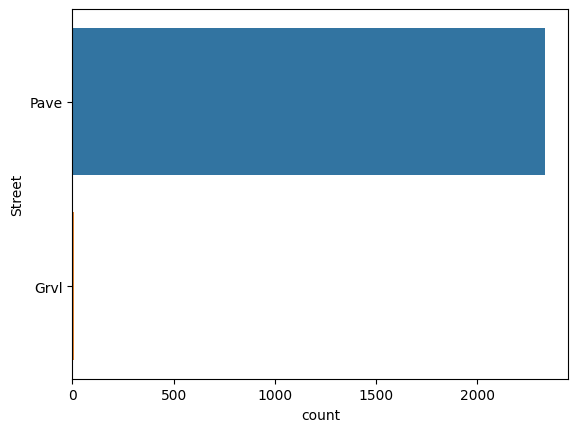

In [70]:
sns.countplot(y='Street', data=selection_features)

In [104]:
# Build the preprocessing
preprocessing_cat = make_column_transformer(
    (
        make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()),
        selection_features.select_dtypes("number").columns
    ),
    (
        OneHotEncoder(categories=['Pave', 'Grvl']),
        ['Street']
    ),
    (
        make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), OneHotEncoder()),
        ['Lot Shape', 'Garage Type', 'Condition']
    )
)

# Build a pipeline with the preprocessing and a linear regression model
ridge_cv_cat_pipeline = make_pipeline(
    preprocessing,
    GridSearchCV(Ridge(), param_grid={'alpha': [0.1, 1, 10, 1000]})
  )

# Learning curve for Ridge
ridge_cv_cat_results = learning_curve(
    ridge_cv_cat_pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    train_sizes=[0.1  , 0.325, 0.55 , 0.775, 1.   ],
    cv=10
)

(0.0, 0.3)

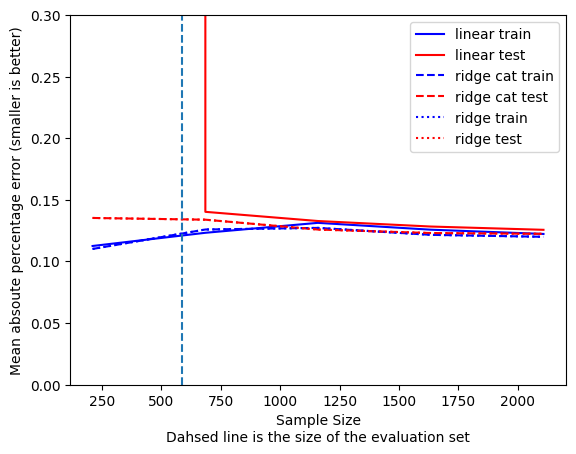

In [105]:
train_sizes, train_scores, test_scores = lr_results
ridge_train_sizes, ridge_cv_cat_train_scores, ridge_cv_cat_test_scores = ridge_cv_cat_results
_, ridge_cv_train_scores, ridge_cv_test_scores = ridge_cv_results


plt.plot(train_sizes, -np.mean(train_scores, axis=1), c='b', label='linear train');
plt.plot(train_sizes, -np.mean(test_scores, axis=1), c='r', label='linear test');
plt.plot(train_sizes, -np.mean(ridge_cv_cat_train_scores, axis=1), c='b', ls='--', label='ridge cat train');
plt.plot(train_sizes, -np.mean(ridge_cv_cat_test_scores, axis=1), c='r', ls='--', label='ridge cat test');
plt.plot(train_sizes, -np.mean(ridge_cv_train_scores, axis=1), c='b', ls=':', label='ridge train');
plt.plot(train_sizes, -np.mean(ridge_cv_test_scores, axis=1), c='r', ls=':', label='ridge test');


plt.legend()
plt.xlabel("Sample Size\nDahsed line is the size of the evaluation set")
plt.ylabel("Mean absoute percentage error (smaller is better)")
plt.axvline(len(evaluation_target), ls='--')
plt.ylim(0, .3)

In [98]:
ridge_cv_cat_test_scores.mean(axis=1), ridge_cv_test_scores.std(axis=1)

(array([nan, nan, nan, nan, nan]),
 array([0.01406395, 0.01480691, 0.01282042, 0.01335347, 0.01448073]))

## Question 9

Non linearity! Now use the RandomForestRegressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html to fit and predict the data. The two hyper-parameters that you will use are

* n_estimators : with a default of 100 which deals with the uncertainty in the data/algorithm relationship.
* max_depth : with a no limit as a default which deals with the granularity of the solution.

Use a Grid search cross validation to set the two parameters. Plot the learning curve.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

## Question 10

We will now use the data to obtain
Use permutation feature importance to assess which are the most important features in predicting house pricing https://scikit-learn.org/stable/modules/permutation_importance.html

Compare these importances across models.

In [108]:
from sklearn.inspection import permutation_importance
from sklearn.base import clone

In [113]:
ridge_cv_pipeline_validation = clone(ridge_cv_pipeline)

evaluation_features_train, evaluation_features_test, evaluation_target_train, evaluation_target_test= \
  train_test_split(evaluation_features, evaluation_target, test_size=.2)


In [134]:
permutation_importance?

In [137]:
ridge_cv_pipeline_validation.fit(evaluation_features_train, evaluation_target_train)
feature_importance = permutation_importance(
    ridge_cv_pipeline_validation, evaluation_features_test, evaluation_target_test,
    scoring='neg_mean_absolute_error'
  )

In [133]:
evaluation_features_test

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
2468,2469,528488120,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1990,1991,902300040,70,RM,53.0,9863,Pave,Pave,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml
1489,1490,908103260,85,RL,64.0,12102,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Family
65,66,528386040,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2038,2039,903458020,75,RM,60.0,7200,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1107,528365060,60,RL,96.0,10542,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
1074,1075,528186130,120,RL,89.0,8232,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2008,New,Partial
1529,1530,909256060,50,RL,51.0,10480,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
2396,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,10,2006,New,Partial


In [142]:
pd.DataFrame(
    [
        feature_importance['importances_mean'].T,
        feature_importance['importances_std'].T,
     ],
    columns=evaluation_features_test.columns,
    index=['mean', 'std']
).T.sort_values(by='mean')

,mean,std
Yr Sold,-449.230670,165.944528
Misc Val,-291.850054,472.907713
BsmtFin SF 2,-123.892012,98.875360
TotRms AbvGrd,-120.732783,193.065964
Full Bath,-79.059862,38.906209
...,...,...
1st Flr SF,3132.127724,794.488037
Year Built,4878.061133,1016.556332
2nd Flr SF,5175.180498,619.661761
Gr Liv Area,8961.275661,1175.742575


Simulation of a house with double value in "Overal Qual" to observe effect in Sale price

In [150]:
# Build the simulated house
baseline_case = evaluation_features_test.iloc[:1].copy()
simulated_case = evaluation_features_test.iloc[:1].copy()
simulated_case['Overall Qual'] *= 2
comparison_set = pd.concat([
  baseline_case,
  simulated_case
])
comparison_set['Overall Qual']

2468     7
2468    14
Name: Overall Qual, dtype: int64

In [149]:
# Predict the sale value for the true and simulated house
ridge_cv_pipeline_validation.predict(comparison_set).round()

array([184569., 299838.])

## Question 11

Pick one of the estimators. Use cross_val_predict to evaluate the quality of the prediction in different cases.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py

Cross-val predict will give you for each element in the target, a prediction. Produce a scatterplot between target and prediction, use the trained model and the predictive importance to find the most explanatory variables.

In [ ]:
from sklearn.model_selection import cross_val_predict


# Section 3: Analyzing our phenomenon.

Now that we have picked one model: